In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from Logical_regression2 import get_binary_data

0 160.22106484088974 79.95368050894884
1000 51.8400598380428 22.02461264182498
2000 51.45719633335095 21.993937320723795
3000 51.427133149263845 22.030350554523128
4000 51.42416813883903 22.045107749595715
5000 51.42385712503064 22.050203167365172
6000 51.423823870626364 22.051901346319127
7000 51.42382029287733 22.05246166150319
8000 51.42381990715947 22.052645975498574
9000 51.42381986554093 22.052706547676504
train classification rate 0.9697986577181208
test classification rate 0.96


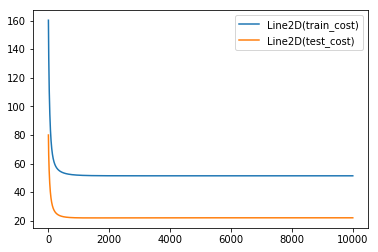

In [112]:
X, Y=get_binary_data()
X,Y=shuffle(X,Y)
Xtrain=X[:-100]
Ytrain=Y[:-100]

Xtest=X[-100:]
Ytest=Y[-100:]

D=X.shape[1]
w=np.random.randn(D)     #weight randomly selected
b=0
epsilon=1e-10
alpha=0.001

def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward(X,w,b):

    return sigmoid(np.dot(X,w)+b)

def classification_rate(Y,P):
    return np.mean(Y==P)

def cross_entropy_err(Yp,t):
    
    Err=(-1.0*(t*np.log(Yp+epsilon)+(1.0-t)*np.log(1-Yp+epsilon)))
    return np.sum(Err)

train_cost=[]
test_cost=[]

for time in range(10000):
    
    Ytrain_p=forward(Xtrain,w,b)
    Ytest_p=forward(Xtest,w,b) 
    
    err_train=cross_entropy_err(Ytrain_p,Ytrain)
    err_test=cross_entropy_err(Ytest_p,Ytest)
    
    train_cost.append(err_train)
    test_cost.append(err_test)
     
    derivative=np.dot(Xtrain.T,(Ytrain_p-Ytrain))   
    w=w-alpha*derivative
    b=b-alpha*(Ytrain_p-Ytrain).sum()                 #x0=1  -> dot product to sum
    
    if (time%1000==0):
        #print(w,time)
        print(time,err_train,err_test)
print('train classification rate',classification_rate(Ytrain,np.round(Ytrain_p)))
print('test classification rate',classification_rate(Ytest,np.round(Ytest_p)))


legend1, =plt.plot(train_cost,label='train_cost')
legend2, =plt.plot(test_cost,label='test_cost')
plt.legend([legend1,legend2])
plt.show()



#Only the training data is being used to update the weights (look at the gradient descent lines).
#We have a test set because we don't just want to know "how accurate the model is", we want to know how well it performs on data it has not seen before.
#That's the whole basis for ML: predict things you don't know.
#It is possible for the test accuracy to be better than the train accuracy, but it's usually the other way around (depend on input A.N.)

In [103]:
np.shape(Ytrain)

(298,)

In [59]:
X

array([[ 1.        , -0.81697841,  0.34417135, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.13967078, -0.71388559, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.81697841,  1.05226503, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        , -0.81697841, -0.7201438 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.81697841,  0.65788193, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.09631997, -1.05140471, ...,  0.        ,
         1.        ,  0.        ]])

In [60]:
Xtrain

array([[ 1.        , -0.81697841,  0.34417135, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.13967078, -0.71388559, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.81697841,  1.05226503, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        , -0.81697841, -1.06781851, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -0.81697841, -0.94617165, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.81697841, -0.78902047, ...,  0.        ,
         0.        ,  1.        ]])

In [61]:
Xtest

array([[ 0.        , -0.81697841, -0.71803969,  1.        ,  2.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        , -0.81697841,  0.57971669,  1.        ,  3.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.13967078, -0.19379404,  0.        ,  3.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        , -0.81697841,  0.16249219,  1.        ,  2.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.13967078, -0.98591295,  1.        ,  3.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.13967078,  0.46042058,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.81697841,  0.87348202,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.        , -0.81697841, -0.58366216,  1.        ,  1